In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.options.mode.chained_assignment = None 

## Exploring and Cleaning

In [3]:
data=pd.read_csv('tmdb_5000_movies.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [5]:
data.dtypes[data.dtypes!='object']

budget            int64
id                int64
popularity      float64
revenue           int64
runtime         float64
vote_average    float64
vote_count        int64
dtype: object

In [6]:
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:
list_numeric=list((data.dtypes[data.dtypes!='object']).index)
list_numeric.remove('id')

In [8]:
data_num=data[list_numeric]

In [9]:
data_num.head()

,budget,popularity,revenue,runtime,vote_average,vote_count
0,237000000,150.437577,2787965087,162.0,7.2,11800
1,300000000,139.082615,961000000,169.0,6.9,4500
2,245000000,107.376788,880674609,148.0,6.3,4466
3,250000000,112.312950,1084939099,165.0,7.6,9106
4,260000000,43.926995,284139100,132.0,6.1,2124


In [10]:
data_num.isnull().sum()

budget          0
popularity      0
revenue         0
runtime         2
vote_average    0
vote_count      0
dtype: int64

In [11]:
data_num['runtime'].mode()

0    90.0
dtype: float64

In [12]:
#data_num['runtime']=data_num['runtime'].fillna(data_num['runtime'].mean())

In [13]:
data_num.isnull().sum()

budget          0
popularity      0
revenue         0
runtime         2
vote_average    0
vote_count      0
dtype: int64

In [14]:
data_num.head()

,budget,popularity,revenue,runtime,vote_average,vote_count
0,237000000,150.437577,2787965087,162.0,7.2,11800
1,300000000,139.082615,961000000,169.0,6.9,4500
2,245000000,107.376788,880674609,148.0,6.3,4466
3,250000000,112.312950,1084939099,165.0,7.6,9106
4,260000000,43.926995,284139100,132.0,6.1,2124


In [15]:
data_num.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [16]:
data_num.loc[:,'runtime']=data_num['runtime'].map(lambda x: np.nan if x==0 else x)
data_num['runtime'].fillna(data_num['runtime'].mean(), inplace=True)

In [17]:
data_num.isnull().sum()

budget          0
popularity      0
revenue         0
runtime         0
vote_average    0
vote_count      0
dtype: int64

/home/ibtissem/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


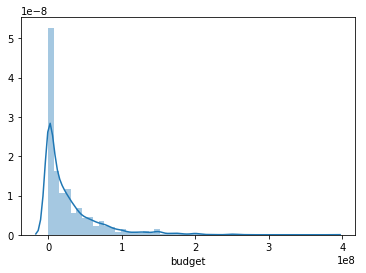

In [18]:
sns.distplot(data_num['budget'])

/home/ibtissem/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


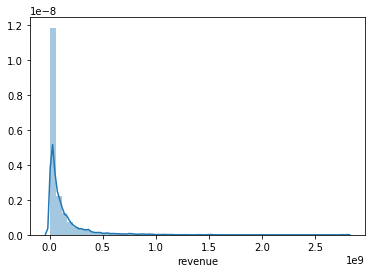

In [19]:
sns.distplot(data_num['revenue'])

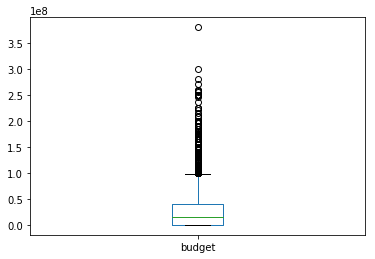

In [20]:
data_num['budget'].plot.box()

In [21]:
data_num.loc[:,'budget']=data_num['budget'].map(lambda x: np.nan if x in range(120) else x)
data_num.loc[:,'revenue']=data_num['revenue'].map(lambda x: np.nan if x in range(100) else x)

In [22]:
data_num.dropna(inplace=True)

In [23]:
data_num.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,3.213000e+03,3213.000000,3.213000e+03,3213.000000,3213.000000,3213.000000
mean,4.083760e+07,29.142287,1.218410e+08,110.777778,6.309991,981.423903
std,4.442833e+07,36.218886,1.865728e+08,20.958280,0.873038,1416.526705
min,2.180000e+02,0.019984,2.030000e+02,41.000000,0.000000,0.000000
25%,1.100000e+07,10.573191,1.729238e+07,96.000000,5.800000,180.000000
50%,2.500000e+07,20.555090,5.596900e+07,107.000000,6.300000,476.000000
75%,5.500000e+07,37.449630,1.472988e+08,121.000000,6.900000,1150.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


In [24]:
data_num['budget'].value_counts()

20000000.0     126
25000000.0     115
30000000.0     114
40000000.0     111
15000000.0     107
50000000.0      99
35000000.0      87
60000000.0      77
10000000.0      73
5000000.0       66
12000000.0      63
70000000.0      59
80000000.0      57
18000000.0      49
8000000.0       49
45000000.0      47
6000000.0       45
75000000.0      45
2000000.0       43
28000000.0      42
55000000.0      41
3000000.0       40
100000000.0     40
7000000.0       40
150000000.0     40
4000000.0       37
14000000.0      36
13000000.0      35
17000000.0      34
90000000.0      34
              ... 
71000000.0       1
4798235.0        1
41300000.0       1
385907.0         1
32350000.0       1
39200000.0       1
113000000.0      1
20500000.0       1
6800000.0        1
4900000.0        1
280000000.0      1
99000000.0       1
8000.0           1
12000.0          1
50200000.0       1
14800000.0       1
2160000.0        1
2777000.0        1
97250400.0       1
12899867.0       1
1650000.0        1
858000.0    

/home/ibtissem/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


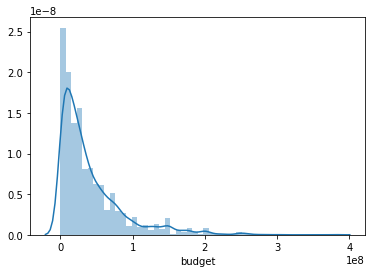

In [25]:
sns.distplot(data_num['budget'])

/home/ibtissem/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


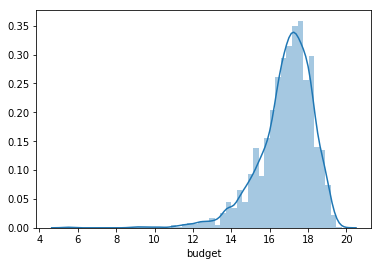

In [26]:
sns.distplot(np.log(data_num['budget']+1))

/home/ibtissem/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


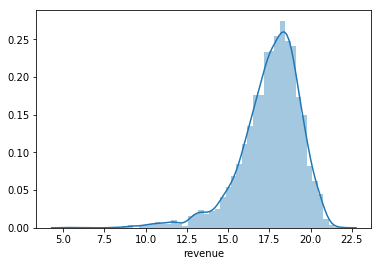

In [27]:
sns.distplot(np.log(data_num['revenue']+1))

In [28]:
data_num['budget']=np.log(data_num['budget']+1)
data_num['revenue']=np.log(data_num['revenue']+1)

In [29]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3213 entries, 0 to 4798
Data columns (total 6 columns):
budget          3213 non-null float64
popularity      3213 non-null float64
revenue         3213 non-null float64
runtime         3213 non-null float64
vote_average    3213 non-null float64
vote_count      3213 non-null int64
dtypes: float64(5), int64(1)
memory usage: 175.7 KB


## PCA

### Standardizing the data

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data_num)

### Correlation

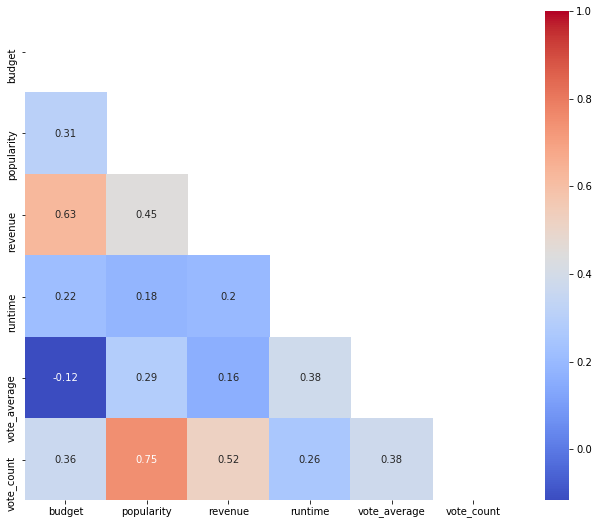

In [34]:
corr=pd.DataFrame(np.corrcoef(scaled_data.T), index=data_num.columns, columns=data_num.columns)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr,mask=mask, annot=True, square=True, cmap='coolwarm')

### Covariance matrix

In [35]:
cov_matrix = np.cov(scaled_data.T)
cov_matrix

array([[ 1.00031133,  0.30801005,  0.62874633,  0.21876533, -0.11643414,
         0.36405744],
       [ 0.30801005,  1.00031133,  0.45007305,  0.18152069,  0.28752913,
         0.74885408],
       [ 0.62874633,  0.45007305,  1.00031133,  0.19936235,  0.16041154,
         0.52166812],
       [ 0.21876533,  0.18152069,  0.19936235,  1.00031133,  0.38091146,
         0.25761837],
       [-0.11643414,  0.28752913,  0.16041154,  0.38091146,  1.00031133,
         0.3785799 ],
       [ 0.36405744,  0.74885408,  0.52166812,  0.25761837,  0.3785799 ,
         1.00031133]])

### Eigen values and eigen vectors

In [37]:
eig_vals, eig_vects=np.linalg.eig(cov_matrix)

In [38]:
eig_vals

array([2.76054432, 1.28923189, 0.90602475, 0.28857628, 0.23558749,
       0.52190326])

In [39]:
eig_vects

array([[-0.37345516, -0.5390428 ,  0.35272096, -0.65528037,  0.1235915 ,
        -0.02974559],
       [-0.47657686,  0.04659548, -0.45878231,  0.08521259,  0.62226809,
         0.40711595],
       [-0.46457737, -0.32055184,  0.10705234,  0.61387225,  0.01709331,
        -0.5411311 ],
       [-0.28164487,  0.36890044,  0.73764729,  0.2319078 , -0.01377122,
         0.43184979],
       [-0.26749871,  0.67947852,  0.001258  , -0.34963407,  0.16212524,
        -0.56411278],
       [-0.51642446,  0.08203442, -0.33094019, -0.10238214, -0.75547412,
         0.18929202]])

### Sorting eigen values

In [41]:
eig_pairs=list(zip(eig_vals,eig_vects.T))
eig_pairs

[(2.7605443239696683,
  array([-0.37345516, -0.47657686, -0.46457737, -0.28164487, -0.26749871,
         -0.51642446])),
 (1.2892318929392015,
  array([-0.5390428 ,  0.04659548, -0.32055184,  0.36890044,  0.67947852,
          0.08203442])),
 (0.9060247471413033,
  array([ 0.35272096, -0.45878231,  0.10705234,  0.73764729,  0.001258  ,
         -0.33094019])),
 (0.2885762836799766,
  array([-0.65528037,  0.08521259,  0.61387225,  0.2319078 , -0.34963407,
         -0.10238214])),
 (0.2355874868935893,
  array([ 0.1235915 ,  0.62226809,  0.01709331, -0.01377122,  0.16212524,
         -0.75547412])),
 (0.5219032603949373,
  array([-0.02974559,  0.40711595, -0.5411311 ,  0.43184979, -0.56411278,
          0.18929202]))]

In [43]:
eig_pairs.sort(reverse=True)
sorted_eigVals=[eig_pairs[ind][0] for ind in range(len(eig_pairs))]
sorted_eigVects=[eig_pairs[ind][1] for ind in range(len(eig_pairs))]
sorted_eigVals

[2.7605443239696683,
 1.2892318929392015,
 0.9060247471413033,
 0.5219032603949373,
 0.2885762836799766,
 0.2355874868935893]

In [59]:
sorted_eigVects

[array([-0.37345516, -0.47657686, -0.46457737, -0.28164487, -0.26749871,
        -0.51642446]),
 array([-0.5390428 ,  0.04659548, -0.32055184,  0.36890044,  0.67947852,
         0.08203442]),
 array([ 0.35272096, -0.45878231,  0.10705234,  0.73764729,  0.001258  ,
        -0.33094019]),
 array([-0.02974559,  0.40711595, -0.5411311 ,  0.43184979, -0.56411278,
         0.18929202]),
 array([-0.65528037,  0.08521259,  0.61387225,  0.2319078 , -0.34963407,
        -0.10238214]),
 array([ 0.1235915 ,  0.62226809,  0.01709331, -0.01377122,  0.16212524,
        -0.75547412])]

### Choosing the number of principal components

In [49]:
var_cum=np.cumsum(sorted_eigVals)/sum(sorted_eigVals)
var_exp=[var/sum(sorted_eigVals) for var in sorted_eigVals]

In [45]:
var_cum

array([0.45994752, 0.67475263, 0.82570976, 0.91266656, 0.96074764,
       1.        ])

In [50]:
var_exp

[0.45994752404764916,
 0.21480510634509378,
 0.1509571266634437,
 0.08695680425295879,
 0.048081078077605845,
 0.039252360613248743]

Text(0.5,1,'Retained variance')

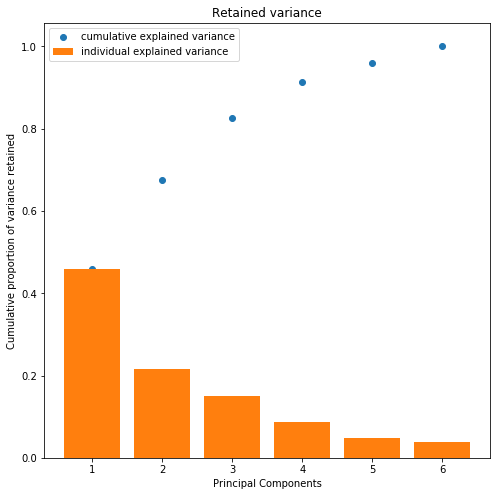

In [54]:
plt.figure(figsize=(8,8))
plt.scatter(range(1,len(sorted_eigVals)+1), var_cum, label='cumulative explained variance')
plt.bar(range(1,len(sorted_eigVals)+1), var_exp, label='individual explained variance')
plt.xticks(range(1,len(sorted_eigVals)+1))
plt.legend()
plt.xlabel("Principal Components")
plt.ylabel("Cumulative proportion of variance retained")
plt.title("Retained variance")

### Projecting the data

In [65]:
dim_reduce=np.array(sorted_eigVects[:4]).T
dim_reduce

array([[-0.37345516, -0.5390428 ,  0.35272096, -0.02974559],
       [-0.47657686,  0.04659548, -0.45878231,  0.40711595],
       [-0.46457737, -0.32055184,  0.10705234, -0.5411311 ],
       [-0.28164487,  0.36890044,  0.73764729,  0.43184979],
       [-0.26749871,  0.67947852,  0.001258  , -0.56411278],
       [-0.51642446,  0.08203442, -0.33094019,  0.18929202]])

In [66]:
Z=np.dot(scaled_data, principal_axes)

In [67]:
Z.shape

(3213, 4)

In [68]:
Z

array([[-8.19358627,  0.7325968 , -1.41780814,  2.00783025],
       [-5.17729981,  0.28157299,  0.67387949,  1.55066067],
       [-4.20674418, -0.50657854,  0.28849631,  1.17449276],
       ...,
       [ 3.71532201,  4.4279391 , -1.47081047,  0.7746471 ],
       [ 3.71079922,  3.64568557, -3.2736819 ,  0.3301787 ],
       [ 2.72691259,  1.87692414, -1.98105391, -0.08392502]])

### PCA with scikit learn

In [55]:
from sklearn.decomposition import PCA

In [56]:
pca=PCA(n_components=4)
pca_model=pca.fit_transform(scaled_data)

In [57]:
pca.components_

array([[ 0.37345516,  0.47657686,  0.46457737,  0.28164487,  0.26749871,
         0.51642446],
       [-0.5390428 ,  0.04659548, -0.32055184,  0.36890044,  0.67947852,
         0.08203442],
       [-0.35272096,  0.45878231, -0.10705234, -0.73764729, -0.001258  ,
         0.33094019],
       [-0.02974559,  0.40711595, -0.5411311 ,  0.43184979, -0.56411278,
         0.18929202]])

In [69]:
pca_model

array([[ 8.19358627,  0.7325968 ,  1.41780814,  2.00783025],
       [ 5.17729981,  0.28157299, -0.67387949,  1.55066067],
       [ 4.20674418, -0.50657854, -0.28849631,  1.17449276],
       ...,
       [-3.71532201,  4.4279391 ,  1.47081047,  0.7746471 ],
       [-3.71079922,  3.64568557,  3.2736819 ,  0.3301787 ],
       [-2.72691259,  1.87692414,  1.98105391, -0.08392502]])

## Clustering

### Scatter between the first and the second dimension

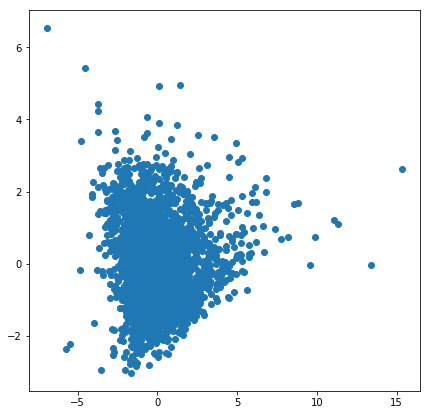

In [70]:
plt.figure(figsize=(7,7))
plt.scatter(pca_model[:,0], pca_model[:,1])

### K means with two clusters

In [71]:
from sklearn.cluster import KMeans

In [72]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(pca_model)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [73]:
kmeans.cluster_centers_

array([[ 1.99053814,  0.20764444, -0.12891498,  0.04207481],
       [-0.74145633, -0.07734556,  0.04801959, -0.01567246]])

In [74]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

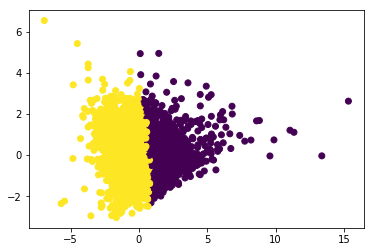

In [75]:
plt.scatter(pca_model[:,0], pca_model[:,1],c=kmeans.labels_)

### K means with three clusters

In [76]:
kmeans3=KMeans(n_clusters=3)
kmeans3.fit(pca_model)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

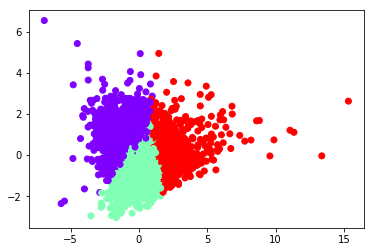

In [78]:
plt.scatter(pca_model[:,0], pca_model[:,1],c=kmeans3.labels_, cmap='rainbow')

### K means with four clusters

In [79]:
kmeans4=KMeans(n_clusters=4)
kmeans4.fit(pca_model)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

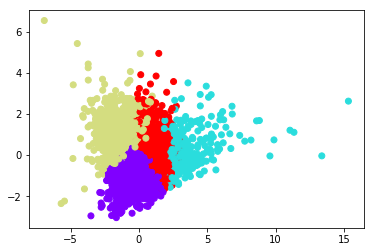

In [80]:
plt.scatter(pca_model[:,0], pca_model[:,1],c=kmeans4.labels_, cmap='rainbow')